In [43]:
from system import *
from numba import njit

e_field = zero_field()
b_field = harris_cs_model(100e-9, 0.15, Re)
system  = System(e_field, b_field)

In [44]:
B0      = np.linalg.norm(b_field(np.array([0, 0, 0])))
B_asymp = np.linalg.norm(b_field(np.array([0, 0, 1000 * Re])))

In [45]:
def eq_pa(history, intrinsic):
    num_particles = len(history[:, 0, 0, 0])
    steps = len(history[0, :, 0, 0])

    v_perp, v_perp_mag = velocity_perp(history)
    mu                 = magnetic_moment(history, intrinsic)
    
    history_new = np.zeros((num_particles, steps)) 

    for i in range(num_particles):
        for j in range(steps):
            history_new[i, j] = np.arcsin(np.sqrt(2 * B0 * mu[i, j] / intrinsic[i, 0]) / v_perp_mag[i, j])

    return history_new

In [47]:
system.populate(100,
                delta(np.array([0., 0., 0.])),
                delta(1e6),
                uniform(np.radians(0), np.radians(90)),
                uniform(0, 2 * np.pi)
               )

100%|██████████| 100/100 [00:00<00:00, 174.22it/s]


In [55]:
system.solve(0.5, 1e-5)

100%|██████████| 100/100 [00:04<00:00, 21.01it/s]


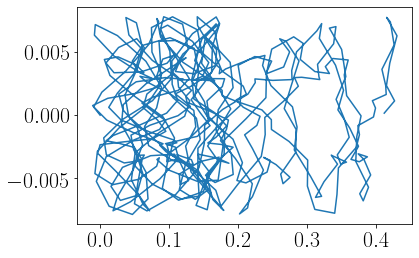

In [56]:
plt.plot(system.history[4, :, 0, 0] / Re, system.history[0, :, 0, 2] / Re)
plt.show()

In [57]:
np.degrees(eq_pa(system.history, system.ics[:, 4, 0:2]))

/home/zach/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: RuntimeWarning: invalid value encountered in arcsin
  if sys.path[0] == '':


array([[90.        , 89.79569258, 89.64056204, ..., 89.36818513,
        89.69576696, 89.95740961],
       [90.        , 88.32301771, 86.83188295, ..., 79.68400982,
        80.03713697, 78.02182461],
       [90.        , 82.38019953, 74.25064081, ..., 45.47686522,
        44.56815858, 42.50451172],
       ...,
       [90.        , 79.84429664, 71.88243577, ..., 22.85424367,
        22.85230223, 22.85064959],
       [90.        , 86.2229578 , 83.20338085, ..., 66.97720267,
        63.83496561, 64.15326729],
       [90.        , 78.98996673, 70.13439641, ..., 43.96570618,
        46.86953972, 48.71564814]])